In [2]:
import json
import math

file = open('/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/e200-large/tmp-times.json',)
cfile = open('/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/config.json',)
data = json.load(file)
config = json.load(cfile)

In [3]:
print(config)

{'budgetParameter': 0.6, 'deadlineParameter': 0.6, 'functionTypes': ['lambda-6144', 'lambda-5120', 'lambda-4096', 'lambda-3072', 'lambda-2560', 'lambda-2048', 'lambda-1536', 'lambda-1024'], 'count': 5, 'provider': 'AWS', 'algorithm': 'loss', 'workflow': 'montage', 'dag': './ellipsoids-200.json', 'prices': {'AWS': {'lambda-128': 2.08e-07, 'lambda-256': 4.17e-07, 'lambda-512': 8.33e-07, 'lambda-768': 1.25e-06, 'lambda-1024': 1.667e-06, 'lambda-1280': 2.084e-06, 'lambda-1536': 2.5e-06, 'lambda-1792': 2.917e-06, 'lambda-2048': 3.333e-06, 'lambda-2560': 4.167e-06, 'lambda-3072': 5e-06, 'lambda-4096': 6.667e-06, 'lambda-5120': 8.334e-06, 'lambda-6144': 1e-05, 'fargate-512025': 1.1244e-05, 'fargate-1050': 4.4977e-05, 'fargate-21': 0.000179911, 'fargate-42': 0.000719644}, 'GCF': {'256': 4.63e-07, '512': 9.25e-07, '1024': 1.65e-06, '2048': 2.9e-06}, 'overheads': {'AWS': 0.043, 'GCF': 0.15, 'IBM': 0.13}}}


In [4]:
def decorate_with_level():
    
    def have_common(list1, list2):
        return sum([element in list1 for element in list2]) > 0
    
    for proc in data["processes"]:
        ancestors = [p.get("level", 0) for p in data["processes"] if have_common(p["outs"], proc["ins"])]
        ancestors.append(0)
        proc["level"] = max(ancestors) + 1

def get_level_to_proc():
    level_to_proc = {}
    for proc in data["processes"]:
        lvl = proc["level"]
        tasks = level_to_proc.get(lvl, [])
        tasks.append(proc["config"]["id"])
        level_to_proc[lvl] = tasks
    return level_to_proc

decorate_with_level()
level_to_proc = get_level_to_proc()

In [5]:
print(level_to_proc)

{1: [1], 2: [2, 3, 4, 5], 3: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [6]:
def get_id_to_process():
    id_to_process = {}
    for proc in data["processes"]:
        id_to_process[proc["config"]["id"]] = proc
    return id_to_process

id_to_process = get_id_to_process()

In [7]:
print(id_to_process)

{1: {'name': 'generateData', 'function': 'awsCommand', 'type': 'dataflow', 'firingLimit': 1, 'config': {'executor': {'executable': 'generateData.js', 'args': []}, 'id': 1}, 'ins': [0], 'outs': [1], 'startTime': {'lambda-6144': 0, 'lambda-5120': 0, 'lambda-4096': 0, 'lambda-3072': 0, 'lambda-2560': 0, 'lambda-2048': 0, 'lambda-1536': 0, 'lambda-1024': 0}, 'finishTime': {'lambda-6144': 729, 'lambda-5120': 695, 'lambda-4096': 692, 'lambda-3072': 693, 'lambda-2560': 742, 'lambda-2048': 707, 'lambda-1536': 699, 'lambda-1024': 747}, 'level': 1}, 2: {'name': 'create_dat_0', 'function': 'awsCommand', 'type': 'dataflow', 'firingLimit': 1, 'config': {'executor': {'executable': 'createDat.js', 'args': ['0.dat']}, 'id': 2}, 'ins': [1], 'outs': [2], 'startTime': {'lambda-6144': 736, 'lambda-5120': 701, 'lambda-4096': 697, 'lambda-3072': 698, 'lambda-2560': 747, 'lambda-2048': 714, 'lambda-1536': 709, 'lambda-1024': 752}, 'finishTime': {'lambda-6144': 1254, 'lambda-5120': 1209, 'lambda-4096': 1088, 

In [8]:
def get_id_to_executions():
    id_to_executions = {}
    for proc in data["processes"]:
        executions = []
        for function in proc["startTime"]:
            time = proc["finishTime"][function] - proc["startTime"][function]
            price = config['prices']['AWS'][function]
            cost = price * math.ceil(time / 100)
            executions.append({
                "cost": cost, 
                "time": time, 
                "function": function,
                "proc_id": proc["config"]["id"]
            })
        executions = sorted(executions, key=lambda x: x["time"]) #posortowane rosnąco po czasie
        id_to_executions[proc["config"]["id"]] = executions
    return id_to_executions

id_to_executions = get_id_to_executions()

In [9]:
print(id_to_executions)

{1: [{'cost': 4.6668999999999997e-05, 'time': 692, 'function': 'lambda-4096', 'proc_id': 1}, {'cost': 3.5000000000000004e-05, 'time': 693, 'function': 'lambda-3072', 'proc_id': 1}, {'cost': 5.8338e-05, 'time': 695, 'function': 'lambda-5120', 'proc_id': 1}, {'cost': 1.7500000000000002e-05, 'time': 699, 'function': 'lambda-1536', 'proc_id': 1}, {'cost': 2.6664e-05, 'time': 707, 'function': 'lambda-2048', 'proc_id': 1}, {'cost': 8e-05, 'time': 729, 'function': 'lambda-6144', 'proc_id': 1}, {'cost': 3.3336e-05, 'time': 742, 'function': 'lambda-2560', 'proc_id': 1}, {'cost': 1.3336e-05, 'time': 747, 'function': 'lambda-1024', 'proc_id': 1}], 2: [{'cost': 1.6668e-05, 'time': 384, 'function': 'lambda-2560', 'proc_id': 2}, {'cost': 2.6668e-05, 'time': 391, 'function': 'lambda-4096', 'proc_id': 2}, {'cost': 2.5e-05, 'time': 467, 'function': 'lambda-3072', 'proc_id': 2}, {'cost': 1.6665e-05, 'time': 500, 'function': 'lambda-2048', 'proc_id': 2}, {'cost': 5.0004000000000004e-05, 'time': 508, 'fun

In [10]:
#liczenie budgetu i deadline'u
budget_factor = 1.0
deadline_factor = 1.0

def get_min(proc_id, key):
    executions = id_to_executions[proc_id]
    return sorted(executions, key=lambda x: x[key])[0][key]

def get_max(proc_id, key):
    executions = id_to_executions[proc_id]
    return sorted(executions, key=lambda x: x[key], reverse=True)[0][key]


def get_deadline(fun):
    result = 0
    for level in level_to_proc:
        options = [fun(proc_id, 'time') for proc_id in level_to_proc[level]]
        result += sorted(options, reverse=True)[0]
        print(sorted(options, reverse=True)[0])
    return result

def get_budget(fun):
    result = 0
    for level in level_to_proc:
        options = [fun(proc_id, 'cost') for proc_id in level_to_proc[level]]
        result += sum(options)
    return result

MAX_DEADLINE = get_deadline(get_max)
MIN_DEADLINE = get_deadline(get_min)
USER_DEADLINE = MIN_DEADLINE + (MAX_DEADLINE - MIN_DEADLINE) * deadline_factor

MAX_BUDGET = get_budget(get_max)
MIN_BUDGET = get_budget(get_min)
USER_BUDGET = MIN_BUDGET + (MAX_BUDGET - MIN_BUDGET) * budget_factor

print(f'MAX DEADLINE {MAX_DEADLINE}')
print(f'MIN DEADLINE {MIN_DEADLINE}')
print(f'USER DEADLINE {USER_DEADLINE}')
print(f'MAX BUDGET {MAX_BUDGET}')
print(f'MIN BUDGET {MIN_BUDGET}')
print(f'USER BUDGET {USER_BUDGET}')

747
810
56494
37291
620
692
571
13529
8167
411
MAX DEADLINE 95962
MIN DEADLINE 23370
USER DEADLINE 95962.0
MAX BUDGET 0.7336628010000054
MIN BUDGET 0.41801932700000016
USER BUDGET 0.7336628010000054


In [11]:

get_deadline(get_max)

747
810
56494
37291
620


95962

In [12]:
v = 568872
aaa = []
for proc in level_to_proc[3]:
    for p in id_to_executions[proc]:
        if p['time'] == v:
            print(p)

In [13]:
# usuwa funkcje dla których istnieje tańsza i równie szybka lub szybsza funkcja 
def prune_useless(array):
    i = 0
    while i < (len(array)-1):
        if array[i]["cost"] <= array[i+1]["cost"]:
            array.pop(i+1)
        else:
            i += 1
    return array

def get_index(array, deadline):
    index = 0
    while index < len(array) and array[index]['time'] <= deadline:
        index += 1
    return index-1

def get_level_to_possibilities():
    level_to_possibilities = {}
    for level in level_to_proc.keys():
        tasks = level_to_proc[level]
        array = []
        possibilities = []
        deadlines = []
        for task in tasks:
            a = id_to_executions[task].copy() # a posortowane jest rosnąco po czasie
            a = prune_useless(a)
            array.append(a)
            for execution in a:
                deadlines.append(execution["time"])
        
        for deadline in deadlines:
            cost = 0
            functions = {}
            shouldAppend = True
            for a in array:
                index = get_index(a, deadline)
                if a[index]['time'] > deadline:
                    shouldAppend = False
                    break
                cost += a[index]["cost"]
                functions[a[index]["proc_id"]] = a[index]["function"]
                
            if shouldAppend:
                possibilities.append({
                    "time": deadline,
                    "cost": cost,
                    "functions": functions
                })
            
        level_to_possibilities[level] = sorted(possibilities, key=lambda x: x["cost"])
    return level_to_possibilities

level_to_possibilities = get_level_to_possibilities()

In [14]:
print(len(level_to_possibilities[1]))

4


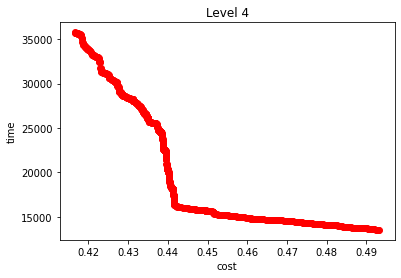

In [15]:
costs = [entity['cost'] for entity in level_to_possibilities[3]]
times = [entity['time'] for entity in level_to_possibilities[3]]
#print(times)
import matplotlib.pyplot as plt
plt.plot(costs, times, 'ro')
plt.ylabel('time')
plt.xlabel('cost')
plt.title('Level 4')
plt.show()
#print(costs)

In [16]:
#scale budget/deadline

max_budget = 0
max_deadline = 0
min_budget = 0
min_deadline = 0

for level in level_to_possibilities:
    possibilities = level_to_possibilities[level]
    max_budget += possibilities[-1]['cost']
    min_deadline += possibilities[-1]['time']
    min_budget += possibilities[0]['cost']
    max_deadline += possibilities[0]['time']
    
scale_budget = max_budget - min_budget
scale_deadline = max_deadline - min_deadline
print()

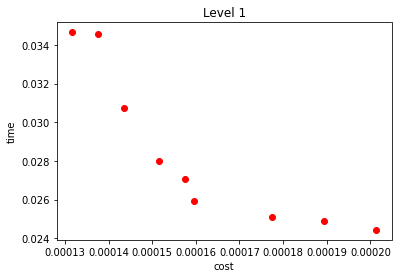

In [17]:
costs = [entity['cost']/min_budget for entity in level_to_possibilities[2]]
times = [entity['time']/min_deadline for entity in level_to_possibilities[2]]

import matplotlib.pyplot as plt
plt.plot(costs, times, 'ro')
plt.ylabel('time')
plt.xlabel('cost')
plt.title('Level 1')
plt.show()


In [18]:
#startuję od najtańszego
level_to_decision = {}
for key in level_to_proc:
    level_to_decision[key] = 0

In [19]:
#liczę parametry obecnego układu
CURRENT_BUDGET = 0
CURRENT_DEADLINE = 0
for level in level_to_possibilities:
    possibilities = level_to_possibilities[level]
    CURRENT_BUDGET += possibilities[0]['cost']
    CURRENT_DEADLINE += possibilities[0]['time']
    
print(f'CURRENT BUDGET {CURRENT_BUDGET}')
print(f'CURRENT DEADLINE {CURRENT_DEADLINE}')

CURRENT BUDGET 0.41801932700000016
CURRENT DEADLINE 56611


In [20]:
def get_best_option_for_level(level, current_option_index):
    possibilities = level_to_possibilities[level]
    options = []
    for index in range(current_option_index+1, len(possibilities)):
        time_delta = possibilities[current_option_index]['time'] - possibilities[index]['time']
        cost_delta = possibilities[index]['cost'] - possibilities[current_option_index]['cost']
        
        if cost_delta <= USER_BUDGET - CURRENT_BUDGET:
            loss = {
                'level': level,
                'index': index,
                'cost_delta': cost_delta,
                'loss': cost_delta / time_delta if time_delta != 0 else 0,
                'time_delta': time_delta
            }
            options.append(loss)
    if len(options) == 0:
        return None
    return sorted(options,key=lambda x: x['loss'])[0]

In [21]:
#dodaję opcje z najlepszym loss'em dla każdego levelu
options = []
for level in level_to_proc:
    option = get_best_option_for_level(level, 0)
    if option:
        options.append(option)

In [22]:
def apply_option(option):
    global USER_BUDGET, CURRENT_BUDGET, CURRENT_DEADLINE
    if option['cost_delta'] <= USER_BUDGET - CURRENT_BUDGET:
        level_to_decision[option['level']] = option['index']
        CURRENT_BUDGET += option['cost_delta']
        CURRENT_DEADLINE -= option['time_delta']
        return True
    return False

In [23]:
time_list = []
cost_list = []
counter = 0
while(len(options) > 0):
    options = sorted(options,key=lambda x: x["loss"])
    
    if(CURRENT_BUDGET <= USER_BUDGET and CURRENT_DEADLINE <= USER_DEADLINE):
        time_list.append(CURRENT_DEADLINE)
        cost_list.append(CURRENT_BUDGET)
    
    applied = apply_option(options[0])
    if applied:
        counter += 1
    new_option = get_best_option_for_level(options[0]['level'], level_to_decision[options[0]['level']])
    if new_option:
        options.append(new_option)
    options = options[1:]
print(f'Applied {counter} updates')

Applied 21 updates


In [24]:
print(f'planned budget {CURRENT_BUDGET}, user budget {USER_BUDGET}')
print(f'planned deadline {CURRENT_DEADLINE}, user deadline {USER_DEADLINE}')

planned budget 0.4951782190000007, user budget 0.7336628010000054
planned deadline 23370, user deadline 95962.0


In [25]:
# DRUGA WERSJA

#startuję od najdroższego/najszybszego
level_to_decision = {}
for key in level_to_proc:
    level_to_decision[key] = len(level_to_possibilities[key])-1
    
#liczę parametry obecnego układu
CURRENT_BUDGET = 0
CURRENT_DEADLINE = 0
for level in level_to_possibilities:
    possibilities = level_to_possibilities[level]
    CURRENT_BUDGET += possibilities[-1]['cost']
    CURRENT_DEADLINE += possibilities[-1]['time']

def get_best_option_for_level(level, current_option_index):
    possibilities = level_to_possibilities[level]
    options = []
    for index in range(current_option_index-1, 0, -1):
        time_delta = possibilities[index]['time'] - possibilities[current_option_index]['time']
        cost_delta = possibilities[current_option_index]['cost'] - possibilities[index]['cost']
        
        if time_delta <= USER_DEADLINE - CURRENT_DEADLINE:
            loss = {
                'level': level,
                'index': index,
                'cost_delta': cost_delta,
                'loss': time_delta / cost_delta if cost_delta != 0 else 0,
                'time_delta': time_delta
            }
            options.append(loss)
    if len(options) == 0:
        return None
    return sorted(options,key=lambda x: x['loss'])[0]

#dodaję opcje z najlepszym (najmniejszym) loss'em dla każdego levelu
options = []
time_list_2 = []
cost_list_2 = []
for level in level_to_proc:
    option = get_best_option_for_level(level, level_to_decision[level])
    if option:
        options.append(option)
        
def apply_option(option):
    global USER_DEADLINE, CURRENT_BUDGET, CURRENT_DEADLINE
    if option['time_delta'] <= USER_DEADLINE - CURRENT_DEADLINE:
        level_to_decision[option['level']] = option['index']
        CURRENT_BUDGET -= option['cost_delta']
        CURRENT_DEADLINE += option['time_delta']
        return True
    return False

counter = 0
while(len(options) > 0):
    options = sorted(options,key=lambda x: x["loss"])
    
    if(CURRENT_BUDGET <= USER_BUDGET and CURRENT_DEADLINE <= USER_DEADLINE):
        time_list_2.append(CURRENT_DEADLINE)
        cost_list_2.append(CURRENT_BUDGET)

    applied = apply_option(options[0])
    if applied:
        counter += 1
    new_option = get_best_option_for_level(options[0]['level'], level_to_decision[options[0]['level']])
    if new_option:
        options.append(new_option)
    options = options[1:]
print(f'Applied {counter} updates')

print(f'planned budget {CURRENT_BUDGET}, user budget {USER_BUDGET}')
print(f'planned deadline {CURRENT_DEADLINE}, user deadline {USER_DEADLINE}')

Applied 20 updates
planned budget 0.4181933850000002, user budget 0.7336628010000054
planned deadline 54262, user deadline 95962.0


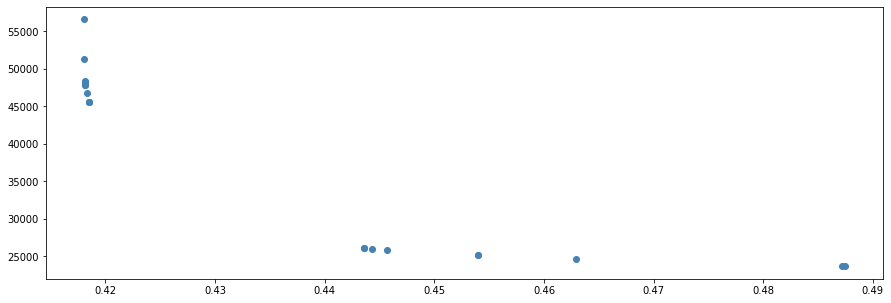

In [26]:
#Both approaches
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 5]

plt.plot(cost_list, time_list, 'o', color='steelblue')
#plt.plot(cost_list_2, time_list_2, 'o', color='red')
plt.show()

In [59]:
#Buckets 

#combines fronts of two levels into one
def add_possibilities(level_a,level_b, p):
    level_c = []
    for a in level_a:
        for b in level_b:
            c = {
                "cost": a["cost"] + b["cost"],
                "time": a["time"] + b["time"],
                "functions": {**a["functions"] , **b["functions"]}
            }
            level_c.append(c)
    level_c = sorted(level_c, key=lambda x: x["time"])
    
    c = 0
    while c < len(level_c)-2:
        if level_c[c+1]["cost"] >= level_c[c]["cost"]:
            level_c.pop(c+1)
        else:
            c += 1
#     plt.plot([x["time"] for x in level_c], [x["cost"] for x in level_c], "o")
#     plt.show()
    if len(level_c) > p:
        print(len(level_c) - p)
        
        bucket_size = (level_c[-1]["time"] - level_c[0]["time"]) / p
        result = []
        treshold = level_c[0]["time"]
        for c in level_c:
            if c['time'] >= treshold:
                result.append(c)
                treshold += bucket_size
                
        return result
            
    return level_c
    

levels = []
for p in level_to_possibilities:
    levels.append(level_to_possibilities[p])
while len(levels) > 1:
    a = levels.pop(0)
    b = levels.pop(0)
    c = add_possibilities(a,b, len(a)+len(b))
    levels.append(c)
print(f'Number of points {len(levels[0])}')
print([(x["time"], x["cost"]) for x in levels[0]])

1
6
380
Number of points 624
[(23370, 0.49517821900000075), (23411, 0.4946048510000008), (23485, 0.49373144700000077), (23495, 0.4934948260000008), (23533, 0.4920734890000007), (23573, 0.49070843700000066), (23614, 0.48939885100000063), (23656, 0.48762107100000057), (23704, 0.4865597750000005), (23733, 0.48605320100000055), (23773, 0.4857965810000005), (23834, 0.4852833410000005), (23872, 0.4844750200000004), (23893, 0.4842250670000004), (23933, 0.4826747860000004), (24006, 0.4809730160000004), (24015, 0.48070973000000045), (24058, 0.4793835340000004), (24094, 0.4782602590000003), (24135, 0.4767004870000001), (24174, 0.47618388700000014), (24217, 0.4756572870000001), (24259, 0.4745290130000001), (24325, 0.4735370930000001), (24341, 0.4732738080000001), (24387, 0.4724154860000001), (24422, 0.47115694600000013), (24459, 0.4695183180000002), (24502, 0.4681663080000003), (24541, 0.46662614800000024), (24584, 0.46409742600000015), (24620, 0.4631489680000001), (24690, 0.46290074300000006), (

In [60]:
#read moheft
dir_path = "e200-large"
_dir = '/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests'
moheft = f"{_dir}/{dir_path}/moheft-dag.json"
moheft_dag = json.load(open(moheft))
print(len(moheft_dag))
moheft_cost = []
moheft_time = []
for i in range(len(moheft_dag)):
    moheft_time.append(moheft_dag[i][0])
    moheft_cost.append(moheft_dag[i][1])
print(moheft_cost)

17
[0.6573500630000001, 0.6573367320000001, 0.656722121999999, 0.6566837909999991, 0.6544806889999981, 0.6542590089999981, 0.6521225379999985, 0.6516083709999986, 0.6482672759999989, 0.648228944999999, 0.6324007309999993, 0.6321790509999993, 0.42865817900000025, 0.419712766000001, 0.419674435000001, 0.418241007000001, 0.418019327000001]


In [61]:
c_result = {}
for _id in id_to_executions:
    executions = id_to_executions[_id]
    for e in executions:
        r = c_result.get(e['function'],0)
        r += e['cost']
        c_result[e['function']] = r
print(c_result)

t_result = {}
partial_result = {}
for l in level_to_proc:
    for p in level_to_proc[l]:
        level = partial_result.get(l, {})
        for e in id_to_executions[p]:
            level[e["function"]] = max(e["time"],level.get(e["function"], 0))
        partial_result[l] = level
        
for l in partial_result:
    result = partial_result[l]
    for fun in result:
        t_result[fun] = t_result.get(fun, 0) + result[fun]
print(t_result)

{'lambda-4096': 0.5796423140000002, 'lambda-3072': 0.5545650000000003, 'lambda-5120': 0.6549357240000024, 'lambda-1536': 0.5017600000000005, 'lambda-2048': 0.5213911890000003, 'lambda-6144': 0.6576400000000014, 'lambda-2560': 0.5450852700000007, 'lambda-1024': 0.48851768400000045}
{'lambda-4096': 30104, 'lambda-3072': 37969, 'lambda-5120': 30315, 'lambda-1536': 66251, 'lambda-2048': 48494, 'lambda-6144': 23945, 'lambda-2560': 47066, 'lambda-1024': 95962}


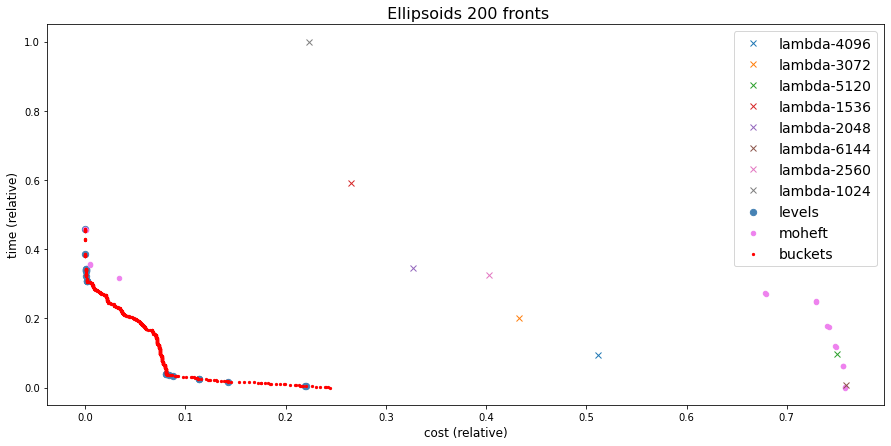

In [68]:
import numpy
#First approach
cost_list_r = [(c - MIN_BUDGET)/(MAX_BUDGET-MIN_BUDGET) for c in cost_list]
time_list_r = [(t - MIN_DEADLINE)/(MAX_DEADLINE-MIN_DEADLINE) for t in time_list]
brute_cost_r = [(c["cost"] - MIN_BUDGET)/(MAX_BUDGET-MIN_BUDGET) for c in levels[0]] 
brute_time_r = [(t["time"] - MIN_DEADLINE)/(MAX_DEADLINE-MIN_DEADLINE) for t in levels[0]]
moheft_cost_r = [(c - MIN_BUDGET)/(MAX_BUDGET-MIN_BUDGET) for c in moheft_cost]
moheft_time_r = [(t - MIN_DEADLINE)/(MAX_DEADLINE-MIN_DEADLINE) for t in moheft_time]

matplotlib.rcParams['figure.figsize'] = [15, 7]

plt.scatter(cost_list_r, time_list_r, s=40, color='steelblue', label="levels")
plt.scatter(moheft_cost_r, moheft_time_r, s=20, color='violet', label="moheft")
plt.scatter(brute_cost_r, brute_time_r, s=5, color='red', label="buckets")

for r in c_result:
    plt.plot((c_result[r] - MIN_BUDGET)/(MAX_BUDGET-MIN_BUDGET), (t_result[r] - MIN_DEADLINE)/(MAX_DEADLINE-MIN_DEADLINE), 'x', label=r)
    
plt.legend(fontsize=14)

plt.ylabel('time (relative)', size=12)
plt.xlabel('cost (relative)', size=12)
plt.title(f' Ellipsoids 200 fronts', size=16)

plt.show()

In [571]:
def get_level_start_time(level):
    if level == 1:
        return 0;
    level -= 1
    return get_level_start_time(level) + level_to_possibilities[level][level_to_decision[level]]["time"]

# create a nice output json
counter = 0
for level in level_to_decision:
    decision = level_to_possibilities[level][level_to_decision[level]]
    start_time = get_level_start_time(level)
    for proc_id in decision["functions"]:
        counter += 1
        p = id_to_process[proc_id]
        function = decision["functions"][proc_id]
        p['config']['deploymentType'] = function
        p['config']['scheduledStartTime'] = start_time
        p['config']['scheduledFinishTime'] = start_time + p["finishTime"][function] - p["startTime"][function]
        if proc_id == 16:
            print(p)
print(f'Processed {counter} tasks')
print(data['processes'])

{'name': 'execute_case_0_10', 'function': 'awsCommand', 'type': 'dataflow', 'firingLimit': 1, 'config': {'executor': {'executable': 'ellipsoids-openmp', 'args': ['0.dat', '010.log', '010.xoutput']}, 'id': 16, 'deploymentType': 'lambda-2560', 'scheduledStartTime': 1507, 'scheduledFinishTime': 7252}, 'ins': [2], 'outs': [26, 27], 'startTime': {'lambda-6144': 1515, 'lambda-5120': 1657, 'lambda-4096': 1395, 'lambda-3072': 1573, 'lambda-2560': 1366, 'lambda-2048': 1562, 'lambda-1536': 1753, 'lambda-1024': 1966}, 'finishTime': {'lambda-6144': 5453, 'lambda-5120': 8742, 'lambda-4096': 7205, 'lambda-3072': 12716, 'lambda-2560': 7111, 'lambda-2048': 15214, 'lambda-1536': 21078, 'lambda-1024': 29853}, 'level': 3}
Processed 810 tasks
[{'name': 'generateData', 'function': 'awsCommand', 'type': 'dataflow', 'firingLimit': 1, 'config': {'executor': {'executable': 'generateData.js', 'args': []}, 'id': 1, 'deploymentType': 'lambda-1536', 'scheduledStartTime': 0, 'scheduledFinishTime': 699}, 'ins': [0],

In [572]:
output_path = '/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/0.25/levels_schedule.json'
with  open(output_path,'w+') as f:
    json.dump(data, f, indent=2)

In [573]:
output_path = '/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/0.25/levels_schedule.csv'
with open(output_path, "w+") as file:
    file.write("id start end function\n")
    for proc in data['processes']:
        file.write(f"{proc['config']['id']} {proc['config']['scheduledStartTime']} {proc['config']['scheduledFinishTime']} {proc['config']['deploymentType']}\n")

In [574]:
full_front = []

for i in range(len(level_to_possibilities[1])):
    d = [i]
    t = level_to_possibilities[1][i]['time']
    c = level_to_possibilities[1][i]['cost']
    d.append(i)
    full_front.append({
        "decisions": d,
        "time": t,
        "cost": c,
        "level": 1
    })

In [575]:
counter = 0
while(True):
    if full_front[0]['level'] == 6:
        break
    possibilities = level_to_possibilities[full_front[0]['level']+1]
    for index in range(len(level_to_possibilities[full_front[0]['level']+1])):
        d = full_front[0]['decisions'].copy()
        d.append(index)
        t = full_front[0]['time'] + possibilities[index]['time']
        c = full_front[0]['cost'] + possibilities[index]['cost']
        full_front.append({
            "decisions": d,
            "time": t,
            "cost": c,
            "level": full_front[0]['level']+1
        })
    full_front = full_front[1:]
    counter += 1
    if counter % 1000 == 0:
        print(counter)

1000
2000
3000
4000
5000
6000
7000
8000
9000


KeyboardInterrupt: 

In [ ]:
print(len(full_front))
print(len(level_to_possibilities[8]))

In [100]:
output_path = '/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/0.15/brute-levels-in-progress.json'
with  open(output_path,'w+') as f:
    json.dump(full_front, f, indent=2)